In [1]:
from deepface import DeepFace
import os
from retinaface import RetinaFace
import time
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import pickle
import cv2
from imutils import build_montages

In [ ]:
path = "./faces"
images = os.listdir(path)
for image in images:
    if image.startswith("noise") and image.split(".")[0].endswith("n"):
        images.remove(image)
images

In [7]:
image_path = "./faces/banga1.jpg"
face_objs = DeepFace.extract_faces(
                        img_path=image_path,
                        detector_backend="yolov8",
                        enforce_detection = False,
                        
                    )

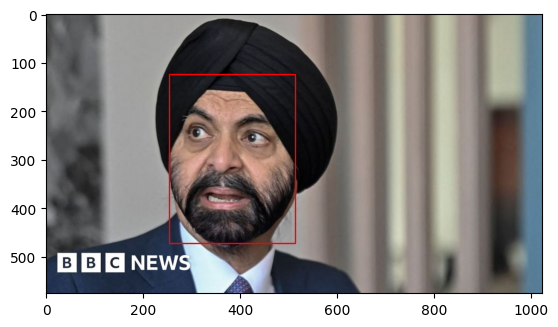

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
image_path = "./faces/banga1.jpg"
image = Image.open(image_path)

# Define the bounding box (x, y, width, height)
bbox = (face_objs[0]['facial_area']['x'], face_objs[0]['facial_area']['y'], face_objs[0]['facial_area']['w'], face_objs[0]['facial_area']['h'])  # Replace x, y, w, h with actual values

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Create a Rectangle patch
rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')

# Add the rectangle to the Axes
ax.add_patch(rect)

# Show the plot with the bounding box
plt.show()

In [56]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepID", 
  "ArcFace", 
  "SFace",
  "GhostFaceNet",
]
embedding_times = {model: 0 for model in models}
embeddings = {model: {} for model in models}
new_embeddings = {model: {} for model in models} # embeddings of images with only one face
for model in models:
    for image in images:
        embeddings[model][image] = []

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for image in images:
    print(image)
    faces = DeepFace.extract_faces(
        img_path = f"{path}/{image}",
        detector_backend = 'yolov8',
        enforce_detection = False,
        align = True
    )
    num_faces = len(faces)
    fig, axes = plt.subplots(1, num_faces, figsize=(20, 5))
    # If only one face is detected, axes will not be a list
    if num_faces == 1:
        axes = [axes]
    
    for ax, face in zip(axes, faces):
        # Convert face image to an array
        face_img = np.array(face["face"])
        # Display the face image
        ax.imshow(face_img)
        ax.axis("off")
    
    plt.show()
    print("**************************************")

In [57]:
for model in models:
    print("model: ", model)
    t = 0
    t1 = time.time()
    for image in images:
        try:
            embedding = DeepFace.represent(
                img_path= f"{path}/{image}",
                model_name = model,
                detector_backend = 'yolov8',  
                align=False, 
                enforce_detection=True,
            )
            for embed in embedding:
                embeddings[model][image].append(embed['embedding'])
            if len(embedding) == 1:
                new_embeddings[model][image] = embedding[0]['embedding']
        except:
            pass
    t2 = time.time()
    t = t2-t1
    embedding_times[model] = t

model:  VGG-Face
model:  Facenet
model:  Facenet512
model:  OpenFace
model:  DeepID
model:  ArcFace
model:  SFace
model:  GhostFaceNet


In [44]:
embedding_times

{'VGG-Face': 254.29969334602356,
 'Facenet': 325.3385577201843,
 'Facenet512': 339.0547950267792,
 'OpenFace': 158.20538353919983,
 'DeepID': 74.32008457183838,
 'ArcFace': 258.2005579471588,
 'SFace': 95.95001745223999,
 'GhostFaceNet': 291.07245206832886}

In [61]:
with open("embeddings", "wb") as f:
    f.write(pickle.dumps(embeddings))
with open("new_embeddings", "wb") as f:
    f.write(pickle.dumps(new_embeddings))